<a href="https://colab.research.google.com/github/taengbae/DNA/blob/main/%EC%95%84%ED%8C%8C%ED%8A%B8%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install plotly

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,608 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')

In [ ]:
건축허가현황 = '/content/drive/MyDrive/Colab Notebooks/data/건축허가현황.csv'
국내건설수주액 = '/content/drive/MyDrive/Colab Notebooks/data/국내건설수주액.csv'
미분양주택현황 = '/content/drive/MyDrive/Colab Notebooks/data/미분양주택현황.csv'
아파트실거래가격지수 = '/content/drive/MyDrive/Colab Notebooks/data/아파트 실거래가격지수.csv'
주택월세통합가격지수 = '/content/drive/MyDrive/Colab Notebooks/data/유형별_주택월세통합가격지수.csv'
주택건설인허가실적 = '/content/drive/MyDrive/Colab Notebooks/data/주택건설인허가실적.csv'
주택매매가격지수 = '/content/drive/MyDrive/Colab Notebooks/data/주택매매가격지수(KB).csv'
주택전세가격지수 = '/content/drive/MyDrive/Colab Notebooks/data/주택전세가격지수(KB).csv'
지가변동률 = '/content/drive/MyDrive/Colab Notebooks/data/지역별_지가변동률.csv'
코스피지수 = '/content/drive/MyDrive/Colab Notebooks/data/코스피지수_2012to2021.csv'

In [ ]:
data_mae = pd.read_csv(주택매매가격지수)
data_jeon = pd.read_csv(주택전세가격지수)
data_kospi = pd.read_csv(코스피지수, encoding='cp949')

In [ ]:
data_mae.head()

,Unnamed: 0,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,34.656,61.347,43.053,20.973,17.153,30.044
1,1986-02-01,34.656,61.347,42.925,20.973,17.183,30.044
2,1986-03-01,34.708,61.513,42.733,20.935,17.153,30.002
3,1986-04-01,34.449,61.097,42.733,20.819,17.034,29.837
4,1986-05-01,34.293,60.848,41.837,20.664,16.945,29.588


In [ ]:
data_kospi.head()

,주가구분별(1),주가구분별(2),주가구분별(3),2012. 01,2012. 02,2012. 03,2012. 04,2012. 05,2012. 06,2012. 07,2012. 08,2012. 09,2012. 10,2012. 11,2012. 12,2013. 01,2013. 02,2013. 03,2013. 04,2013. 05,2013. 06,2013. 07,2013. 08,2013. 09,2013. 10,2013. 11,2013. 12,2014. 01,2014. 02,2014. 03,2014. 04,2014. 05,2014. 06,2014. 07,2014. 08,2014. 09,2014. 10,2014. 11,2014. 12,2015. 01,...,2018. 03,2018. 04,2018. 05,2018. 06,2018. 07,2018. 08,2018. 09,2018. 10,2018. 11,2018. 12,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12,2020. 01,2020. 02,2020. 03,2020. 04,2020. 05,2020. 06,2020. 07,2020. 08,2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04,2021. 05,2021. 06
0,연월말,소계,소계,1955.79,2030.25,2014.04,1981.99,1843.47,1854.01,1881.99,1905.12,1996.21,1912.06,1932.90,1997.05,1961.94,2026.49,2004.89,1963.95,2001.05,1863.32,1914.03,1926.36,1996.96,2030.09,2044.87,2011.34,1941.15,1979.99,1985.61,1961.79,1994.96,2002.21,2076.12,2068.54,2020.09,1964.43,1980.78,1915.59,1949.26,...,2445.85,2515.38,2423.01,2326.13,2295.26,2322.88,2343.07,2029.69,2096.86,2041.04,2204.85,2195.44,2140.67,2203.59,2041.74,2130.62,2024.55,1967.79,2063.05,2083.48,2087.96,2197.67,2119.01,1987.01,1754.64,1947.56,2029.60,2108.33,2249.37,2326.17,2327.89,2267.15,2591.34,2873.47,2976.21,3012.95,3061.42,3147.86,3203.92,3296.68
1,등락폭,소계,소계,130.05,74.46,-16.21,-32.05,-138.52,10.54,27.98,23.13,91.09,-84.15,20.84,64.15,-35.11,64.55,-21.60,-40.94,37.10,-137.73,50.71,12.33,70.60,33.13,14.78,-33.53,-70.19,38.84,5.62,-23.82,33.17,7.25,73.91,-7.58,-48.45,-55.66,16.35,-65.19,33.67,...,18.49,69.53,-92.37,-96.88,-30.87,27.62,20.19,-313.38,67.17,-55.82,163.81,-9.41,-54.77,62.92,-161.85,88.88,-106.07,-56.76,95.26,20.43,4.48,109.71,-78.66,-132.00,-232.37,192.92,82.04,78.73,141.04,76.80,1.72,-60.74,324.19,282.13,102.74,36.74,48.47,86.44,56.06,92.76
2,등락률 (%),소계,소계,7.12,3.81,-0.80,-1.59,-6.99,0.57,1.51,1.23,4.78,-4.22,1.09,3.32,-1.76,3.29,-1.07,-2.04,1.89,-6.88,2.72,0.64,3.66,1.66,0.73,-1.64,-3.49,2.00,0.28,-1.20,1.69,0.36,3.69,-0.37,-2.34,-2.76,0.83,-3.29,1.76,...,0.76,2.84,-3.67,-4.00,-1.33,1.20,0.87,-13.37,3.31,-2.66,8.03,-0.43,-2.49,2.94,-7.34,4.35,-4.98,-2.80,4.84,0.99,0.22,5.25,-3.58,-6.23,-11.69,10.99,4.21,3.88,6.69,3.41,0.07,-2.61,14.30,10.89,3.58,1.23,1.61,2.82,1.78,2.90
3,평균,소계,소계,1891.01,2003.23,2023.41,1995.92,1886.35,1848.60,1826.75,1918.91,1961.29,1942.19,1904.70,1973.84,1986.10,1979.85,1990.24,1938.88,1974.45,1884.41,1871.77,1896.96,1984.39,2029.68,2009.92,1988.33,1948.22,1937.73,1952.43,1991.19,1994.13,1995.08,2021.95,2060.93,2042.71,1942.80,1959.65,1941.93,1920.99,...,2451.57,2458.22,2461.30,2394.51,2284.25,2283.80,2307.33,2153.48,2083.33,2070.13,2101.98,2210.20,2161.91,2212.12,2086.90,2105.30,2079.48,1944.24,2045.21,2065.75,2128.79,2147.01,2203.44,2167.12,1786.75,1849.59,1965.17,2134.70,2195.95,2349.87,2371.52,2357.82,2504.18,2755.77,3089.27,3092.41,3032.47,3165.08,3169.20,3259.14
4,종가기준,최고,지수,1964.83,2030.25,2047.00,2049.28,1999.07,1904.12,1881.99,1957.91,2007.88,1996.03,1937.55,2002.77,2031.10,2026.49,2020.74,1995.99,2001.20,1989.57,1917.05,1926.36,2013.37,2059.58,2045.77,2030.78,1970.42,1979.99,1985.61,2008.61,2017.17,2014.67,2082.61,2080.42,2067.86,1991.54,1982.09,1986.62,1961.58,...,2496.02,2515.38,2505.61,2470.58,2310.90,2322.88,2355.43,2338.88,2114.10,2131.93,2206.20,2234.79,2190.66,2248.63,2212.75,2134.32,2129.74,2017.34,2101.04,2093.60,2162.18,2204.21,2267.25,2243.59,2085.26,1947.56,2031.20,2195.69,2267.01,2437.53,2443.58,2403.73,2633.45,2873.47,3208.99,3163.25,3082.99,3220.70,3249.30,3302.84


In [ ]:
#코스피 데이터 평균 행 추출
df_kospi = data_kospi.iloc[3,3:114]
df_kospi = pd.to_numeric(df_kospi, errors='coerce')
df_kospi

2012. 01    1891.01
2012. 02    2003.23
2012. 03    2023.41
2012. 04    1995.92
2012. 05    1886.35
             ...   
2020. 11    2504.18
2020. 12    2755.77
2021. 01    3089.27
2021. 02    3092.41
2021. 03    3032.47
Name: 3, Length: 111, dtype: float64

In [ ]:
#코스피 데이터 평균 시리즈 -> 데이터 변환
df_kospii = df_kospi.to_frame()
df_kospii = df_kospii.reset_index()
df_kospii.info()
df_kospii.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   111 non-null    object 
 1   3       111 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


,index,3
0,2012. 01,1891.01
1,2012. 02,2003.23
2,2012. 03,2023.41
3,2012. 04,1995.92
4,2012. 05,1886.35


In [ ]:
df_kospii.rename(columns={'index':'날짜'}, inplace=True)
df_kospii['날짜'] = pd.to_datetime(df_kospii['날짜'])
df_kospii

,날짜,3
0,2012-01-01,1891.01
1,2012-02-01,2003.23
2,2012-03-01,2023.41
3,2012-04-01,1995.92
4,2012-05-01,1886.35
...,...,...
106,2020-11-01,2504.18
107,2020-12-01,2755.77
108,2021-01-01,3089.27
109,2021-02-01,3092.41


In [ ]:
data_mae.rename(columns={'Unnamed: 0':'날짜'}, inplace=True)
data_mae['날짜'] = pd.to_datetime(data_mae['날짜'])

In [ ]:
df_mae = data_mae[data_mae['날짜'] >= '2012-01-01']
df_mae.info()
df_mae.head()
df_mae.reset_index()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 312 to 422
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   날짜                    111 non-null    datetime64[ns]
 1   총지수[2019.01=100]      111 non-null    float64       
 2   단독주택[2019.01=100]     111 non-null    float64       
 3   연립주택[2019.01=100]     111 non-null    float64       
 4   아파트[2019.01=100]      111 non-null    float64       
 5   아파트(서울)[2019.01=100]  111 non-null    float64       
 6   총지수(서울)[2019.01=100]  111 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 6.9 KB


,index,날짜,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,312,2012-01-01,88.425,89.553,92.626,87.785,80.089,83.954
1,313,2012-02-01,88.573,89.706,92.682,87.953,79.978,83.878
2,314,2012-03-01,88.707,89.799,92.752,88.122,79.779,83.776
3,315,2012-04-01,88.802,89.904,92.735,88.247,79.433,83.553
4,316,2012-05-01,88.845,90.024,92.774,88.272,79.224,83.424
...,...,...,...,...,...,...,...,...
106,418,2020-11-01,107.125,104.334,106.398,107.506,114.853,112.139
107,419,2020-12-01,108.586,104.909,107.237,109.346,116.365,113.532
108,420,2021-01-01,109.878,105.303,107.895,111.005,118.230,114.974
109,421,2021-02-01,111.375,105.718,108.706,112.957,120.121,116.290


In [ ]:
#코스피 평균 지수(3) & 주택매매가격지수 결합
mae_ko = pd.merge(df_mae, df_kospii, on = '날짜', how = 'outer')
mae_ko.head()
mae_ko.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 110
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   날짜                    111 non-null    datetime64[ns]
 1   총지수[2019.01=100]      111 non-null    float64       
 2   단독주택[2019.01=100]     111 non-null    float64       
 3   연립주택[2019.01=100]     111 non-null    float64       
 4   아파트[2019.01=100]      111 non-null    float64       
 5   아파트(서울)[2019.01=100]  111 non-null    float64       
 6   총지수(서울)[2019.01=100]  111 non-null    float64       
 7   3                     111 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 7.8 KB


In [ ]:
mae_ko.head()

,날짜,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100],3
0,2012-01-01,88.425,89.553,92.626,87.785,80.089,83.954,1891.01
1,2012-02-01,88.573,89.706,92.682,87.953,79.978,83.878,2003.23
2,2012-03-01,88.707,89.799,92.752,88.122,79.779,83.776,2023.41
3,2012-04-01,88.802,89.904,92.735,88.247,79.433,83.553,1995.92
4,2012-05-01,88.845,90.024,92.774,88.272,79.224,83.424,1886.35


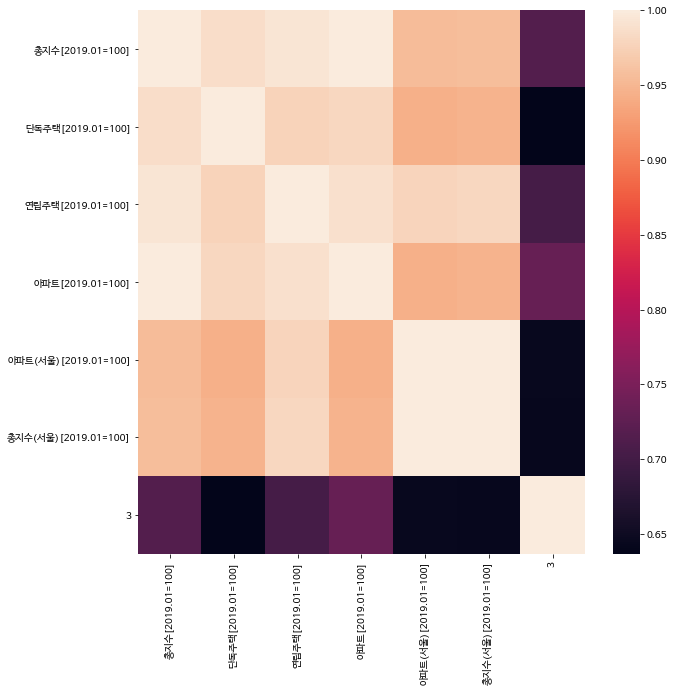

In [ ]:
#주택매매가격지수와 코스피 평균 지수의 상관관계
mae_kop = mae_ko.iloc[:,1:] # 합친거에서 날짜 제외
plt.figure(figsize=(10,10))
sns.heatmap(mae_kop.corr())

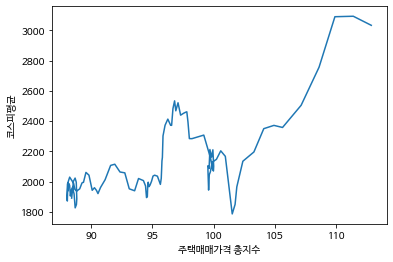

In [ ]:
#평균코스피별 총지수
plt.plot(mae_kop['총지수[2019.01=100]'], mae_kop.iloc[:,6])
plt.xlabel('주택매매가격 총지수')
plt.ylabel('코스피평균')
plt.show()

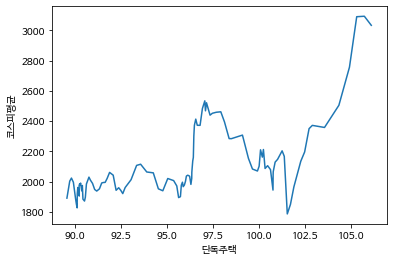

In [ ]:
#평균코스피별 단독주택
plt.plot(mae_kop['단독주택[2019.01=100]'], mae_kop.iloc[:,6])
plt.xlabel('단독주택')
plt.ylabel('코스피평균')
plt.show()

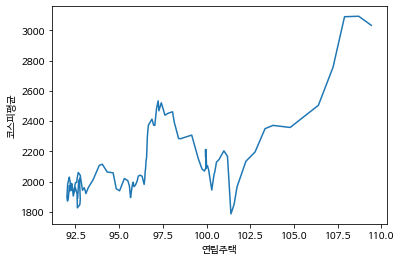

In [ ]:
#평균코스피별 단독주택
plt.plot(mae_kop['연립주택[2019.01=100]'], mae_kop.iloc[:,6])
plt.xlabel('연립주택')
plt.ylabel('코스피평균')
plt.show()

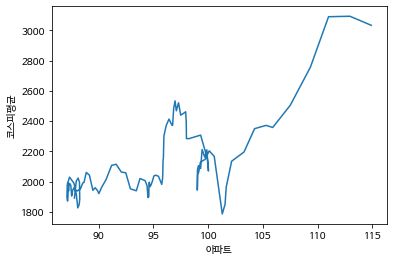

In [ ]:
#평균코스피별 아파트
plt.plot(mae_kop['아파트[2019.01=100]'], mae_kop.iloc[:,6])
plt.xlabel('아파트')
plt.ylabel('코스피평균')
plt.show()

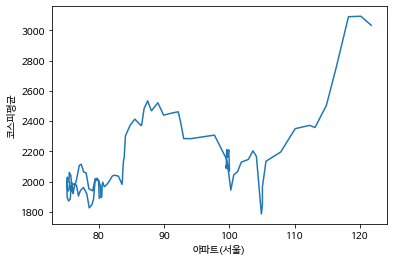

In [ ]:
#평균코스피별 아파트(서울)
plt.plot(mae_kop['아파트(서울)[2019.01=100]'], mae_kop.iloc[:,6])
plt.xlabel('아파트(서울)')
plt.ylabel('코스피평균')
plt.show()

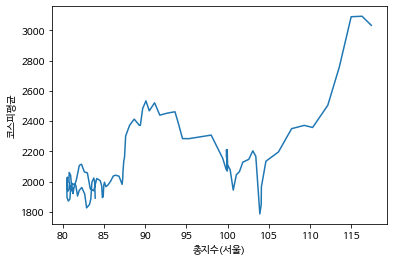

In [ ]:
#평균코스피별 총지수(서울)
plt.plot(mae_kop['총지수(서울)[2019.01=100]'], mae_kop.iloc[:,6])
plt.xlabel('총지수(서울)')
plt.ylabel('코스피평균')
plt.show()